## Plano Tangente 

In [1]:
from sympy import symbols, diff, Plane, Point3D, cos, sin, Eq, Line, Point, exp
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d, plot3d_parametric_line
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = 12, 6

In [3]:
def plot_lines(f, p, n=300, lims=5):
    x_0, y_0 = p
    z_0 = float(f.subs(([x, x_0], [y, y_0])))
    f1 = f.subs(x, x_0)
    f2 = f.subs(y, y_0)
    f1_ = lambdify(y, f1)
    f2_ = lambdify(x, f2)
    t = np.linspace(-5, 5, 300)
    c1 = np.repeat(x_0, n)
    c2 = np.repeat(y_0, n)
    z1 = f1_(t)
    z2 = f2_(t)
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection='3d')
    ax.plot(c1, t, z1, c='b')
    ax.plot(t, c2, z2, c='g')
    ax.scatter(x_0, y_0, z_0, c='r', marker='*', s=100)
    plt.show()

In [4]:
def tangent_lines(f, p):
    x_0, y_0 = p
    z_0 = f.subs(([x, x_0], [y, y_0]))
    pdiv1 = diff(f, x)
    pdiv2 = diff(f, y)
    m1 = pdiv1.subs(([x, x_0], [y, y_0]))
    m2 = pdiv2.subs(([x, x_0], [y, y_0]))
    line1 = z_0 + m1*(x - x_0) 
    line2 = z_0 + m2*(y - y_0)
    return line1, line2
    

In [5]:
def plot_tangent_lines(f, p, n=300, lims=5):
    line1, line2 = tangent_lines(f, p)
    x_0, y_0 = p
    z_0 = float(f.subs(([x, x_0], [y, y_0])))
    l1_ = lambdify(x, line1)
    l2_ = lambdify(y, line2)
    f1 = f.subs(x, x_0)
    f2 = f.subs(y, y_0)
    f1_ = lambdify(y, f1)
    f2_ = lambdify(x, f2)
    t = np.linspace(-5, 5, 300)
    c1 = np.repeat(x_0, n)
    c2 = np.repeat(y_0, n)
    z1 = f1_(t)
    z2 = f2_(t)
    z3 = l1_(t)
    z4 = l2_(t)
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection='3d')
    ax.plot(c1, t, z1, c='b')
    ax.plot(t, c2, z2, c='g')
    ax.plot(t, c2, z3, c='k')
    ax.plot(c1, t, z4, c='k')
    ax.scatter(x_0, y_0, z_0, c='r', marker='*', s=100)
    plt.show()
    
    

In [6]:
def plot_surface(f, n=300, lims=5):
    f_ = lambdify((x, y), f)
    X = np.linspace(-lims, lims, n)
    Y = np.linspace(-lims, lims, n)
    X, Y = np.meshgrid(X, Y)
    Z = f_(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    return fig, ax, surf

In [7]:
def tangent_plane(f, p):
    x_0, y_0 = p
    z_0 = f.subs(([x, x_0], [y, y_0]))
    pdiv1 = diff(f, x)
    pdiv2 = diff(f, y)
    m1 = pdiv1.subs(([x, x_0], [y, y_0]))
    m2 = pdiv2.subs(([x, x_0], [y, y_0]))
    plane = z_0 + m1*(x - x_0) + m2*(y - y_0)
    return plane
    

In [8]:
def plot_tangent_plane(f, p, n =300, lims=5):
    plane = tangent_plane(f, p)
    plane_ = lambdify((x,y), plane)
    f_ = lambdify((x, y), f)
    X = np.linspace(-lims, lims, n)
    Y = np.linspace(-lims, lims, n)
    X, Y = np.meshgrid(X, Y)
    Z1 = f_(X, Y)
    Z2 = plane_(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf1 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    surf2 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)    

### Plano tangente

Si $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ es una función diferenciable en $(x_0, y_0)$, entonces la ecuación del plano tangente a $f$ en este punto es:
$$z = f(x_0, y_0) + \frac{\partial f(x_0, y_0)}{\partial x} (x - x_0) + \frac{\partial f(x_0, y_0)}{\partial y}(y - y_0)   $$

In [9]:
x, y, t = symbols('x y t')

### Ejemplo 1: $f(x, y) = x^2 + y^2$

In [10]:
f = x*x + y*y

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc92f12eb00>)

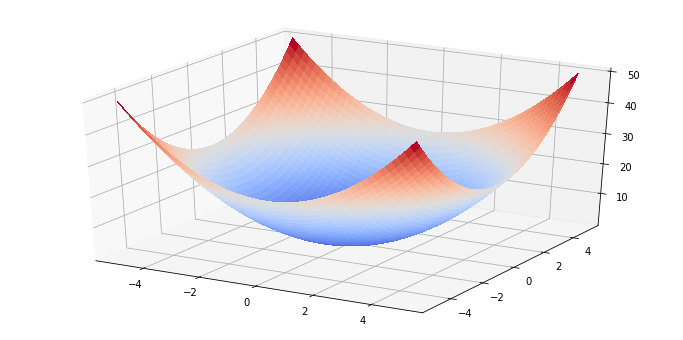

In [11]:
plot_surface(f)

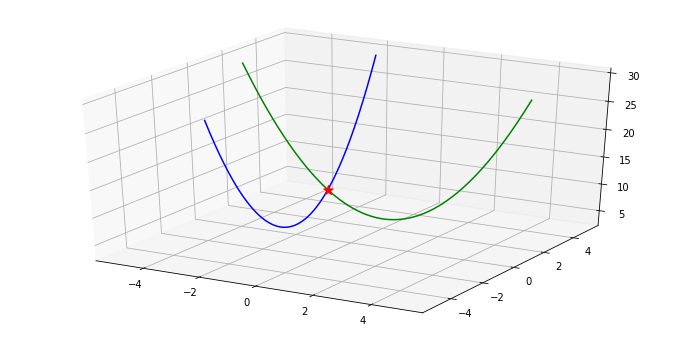

In [12]:
plot_lines(f, (-2,2))

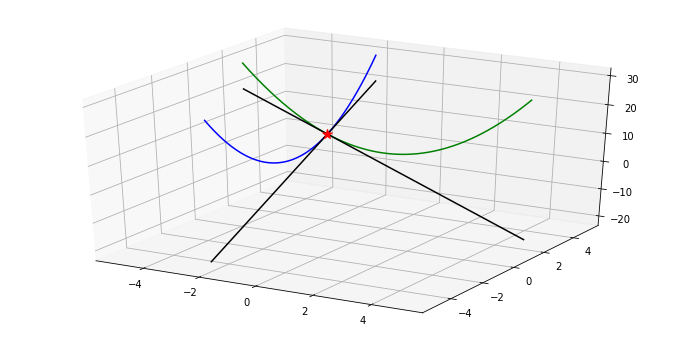

In [13]:
plot_tangent_lines(f, (-2,2))

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc92f906198>)

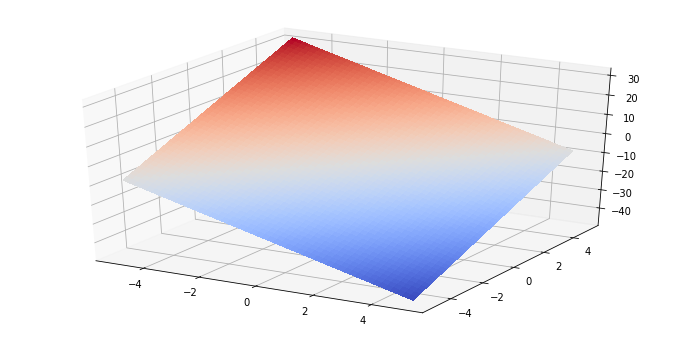

In [14]:
plano = tangent_plane(f, (-2,2))
plot_surface(plano)

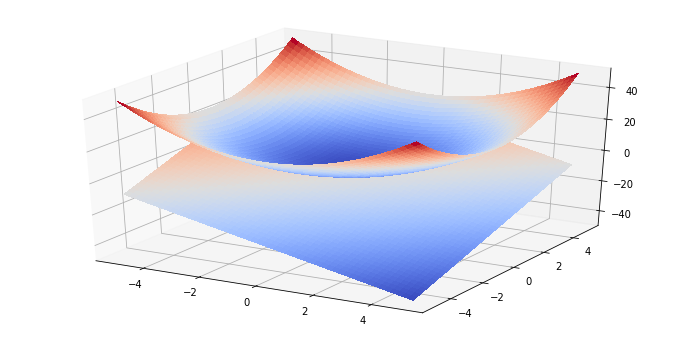

In [15]:
plot_tangent_plane(f, (-2, 2))

In [16]:
p1 = (-1.9, 2.1)

In [17]:
f

x**2 + y**2

In [18]:
plano

-4*x + 4*y - 8

In [19]:
f.subs(([x, p1[0]], [y, p1[1]]))

8.02000000000000

In [20]:
plano.subs(([x, p1[0]], [y, p1[1]]))

8.00000000000000

### Ejercicio 2: $g(x, y) = x\cos(y)$

In [21]:
g = x * cos(y)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc9309b1b70>)

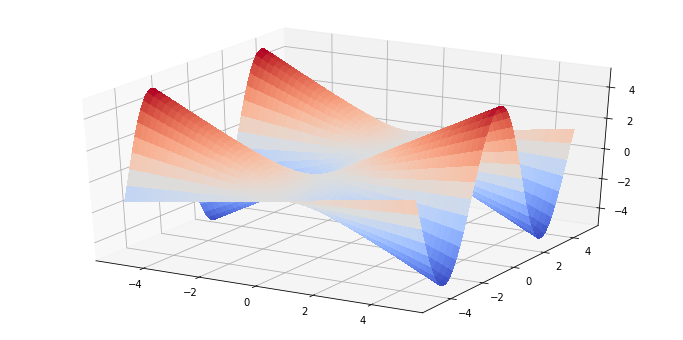

In [22]:
plot_surface(g)

Si hacemos $x = -2$, obtenemos $g(-2, y) = -2 \cos(y)$. Es decir, $g$ se reduce a una función de una variable. 
De igual forma, si hacemos $y = 2$, obtenemos una función lineal $g(x, 2) = x \cos(2)$.

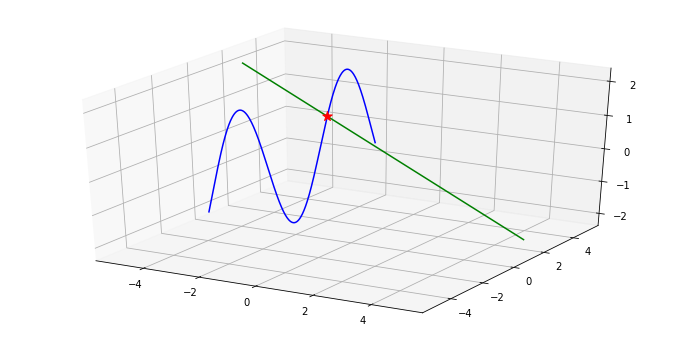

In [23]:
plot_lines(g, (-2,2))

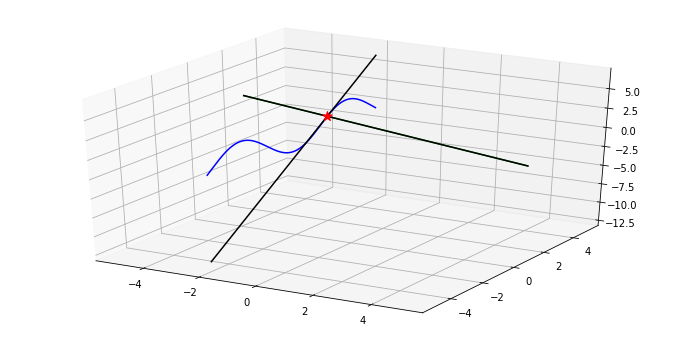

In [24]:
plot_tangent_lines(g, (-2,2))

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc930262b38>)

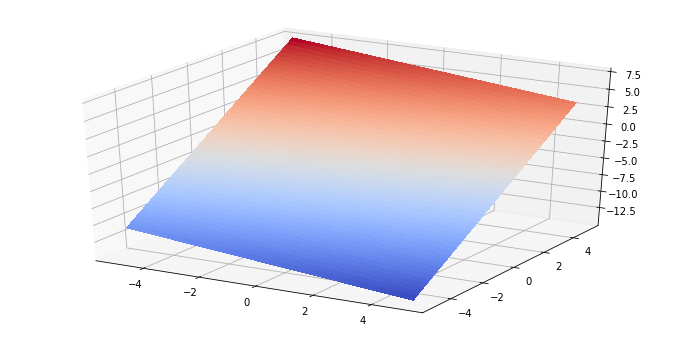

In [25]:
plano = tangent_plane(g, (-2,2))
plot_surface(plano)

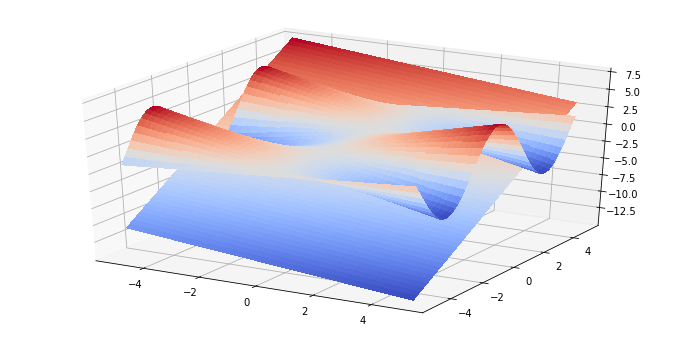

In [26]:
plot_tangent_plane(g, (-2,2))

In [27]:
p1 = (-1.9, 2.1)

In [28]:
g

x*cos(y)

In [29]:
plano

(x + 2)*cos(2) + 2*(y - 2)*sin(2) - 2*cos(2)

In [30]:
g.subs(([x, p1[0]], [y, p1[1]]))

0.959207598739729

In [31]:
float(plano.subs(([x, p1[0]], [y, p1[1]])))

0.972538474804707

### Ejercicio 3: $h(x, y) = \sin(x) \cos(y)$ 

In [32]:
h = sin(x) * cos(y)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc93150c588>)

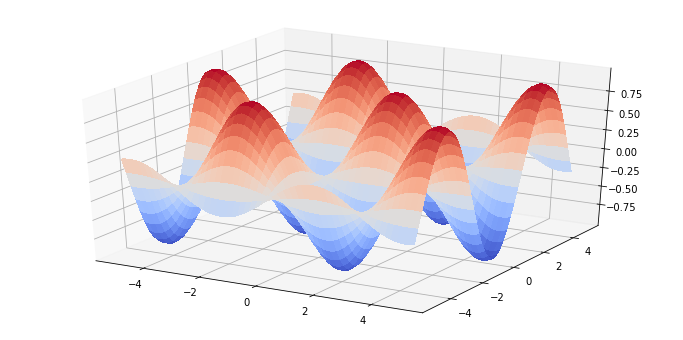

In [33]:
plot_surface(h)

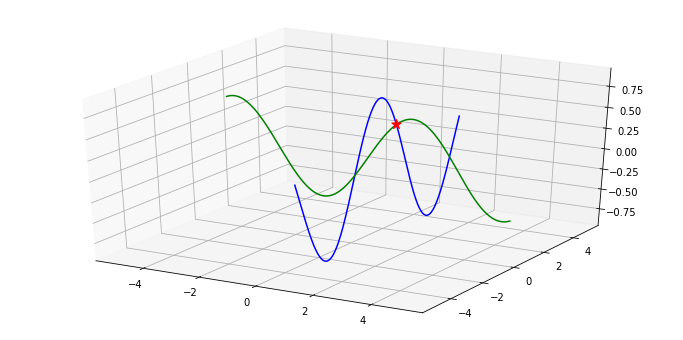

In [34]:
plot_lines(h, (1,1))

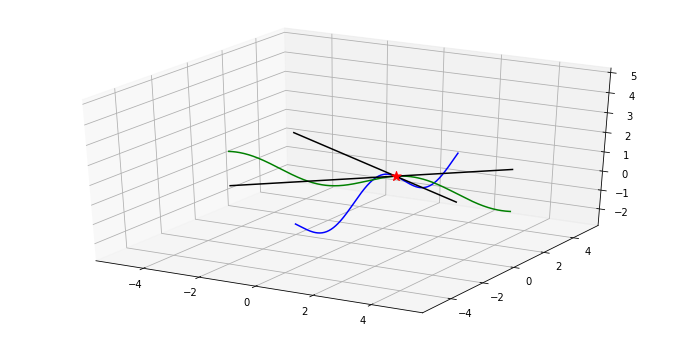

In [35]:
plot_tangent_lines(h, (1,1))

In [36]:
plano = tangent_plane(h, (1,1))

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc9317c9ef0>)

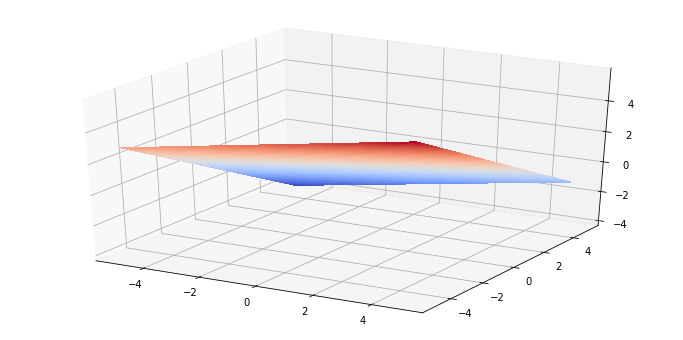

In [37]:
plot_surface(plano)

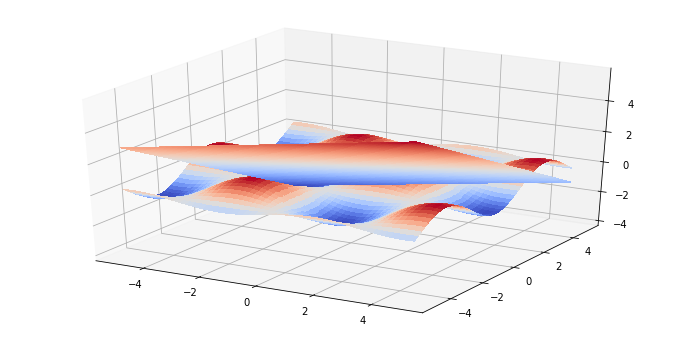

In [38]:
plot_tangent_plane(h, (1,1))

In [39]:
p1 = (1.1, 0.9)

In [40]:
h

sin(x)*cos(y)

In [41]:
plano

(x - 1)*cos(1)**2 - (y - 1)*sin(1)**2 + sin(1)*cos(1)

In [42]:
h.subs(([x, p1[0]], [y, p1[1]]))

0.553983378810371

In [43]:
float(plano.subs(([x, p1[0]], [y, p1[1]])))

0.5546487134128408